<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/PSD_GRAIN_NOT_GRAIN_fev_18_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 4.7MB/s 


In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020/
%cd marquesgabi_out_2020

from Get_PSDArea import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 13.17 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020


In [6]:
!ls

Areas_ImageJ.csv		 PSD_GRAIN_NOT_GRAIN_nov_13_2020.ipynb
Areas_ImageJ.xlsx		 PSD_GRAIN_NOT_GRAIN_out_09_2020.ipynb
GetBetterSegm.py		 PSD_GRAIN_NOT_GRAIN_out_19_2020.ipynb
Get_PSDArea.py			 PSD_GRAIN_NOT_GRAIN_out_28_2020.ipynb
histogram_fev_2021.py		 PSD_USA_ROTINAS_out_05_2020.ipynb
Histogram_PSD_out_19_2020.ipynb  __pycache__
Histogram_PSD_out_23_2020.ipynb  README.md
imageJ_jpg.zip			 Teste
IMAGEJ_Zuados.zip


In [7]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 37.31 MiB/s, done.
Resolving deltas: 100% (144/144), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado


In [8]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 39.93 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [10]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

Cloning into 'marquesgabi_set_2020'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 266 (delta 44), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (266/266), 7.00 MiB | 28.45 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020


In [11]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [12]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 41.42 MiB/s, done.
Resolving deltas: 100% (144/144), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [13]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [14]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 40.53 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado


In [15]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [16]:
df=Segmenta(img)

In [17]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Epoch 1/200
11/11 [==============================] - 1s 3ms/step - loss: 24.7848 - accuracy: 0.3726
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9338 - accuracy: 0.5843
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 0.7907 - accuracy: 0.5389
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1169 - accuracy: 0.4969
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.5320
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 1.3446 - accuracy: 0.4988
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9936 - accuracy: 0.5390
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8990
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7302 - accuracy: 0.5347
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.7418
Epoch 11

In [18]:
# print(y_pred.ravel())

In [19]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [20]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [21]:
df.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,165,93.391846,91.568451,96.815247,100.688232,102.083755,103.884232,105.079414,112.856674,114.098038,113.896523,119.081406,124.331207,118.344688,113.706665,114.476044,117.811432,130.208267,153.781754,163.689102,148.662918,74.029579,75.378845,72.875153,73.393349,71.527718,72.047241,76.681618,80.054916,96.313789,94.309097,96.368370,100.108543,100.425865,96.712433,98.999710,115.182045,116.723999,121.432831,125.994453,...,77.933815,84.307076,68.776863,73.717758,102.448265,136.626999,144.036545,140.381912,133.699066,132.302200,130.724304,130.984726,125.777596,124.364342,123.281769,119.286682,115.017715,112.544395,109.121727,110.095390,114.214912,119.314713,120.021530,119.089294,123.063362,126.009842,127.340240,113.917358,78.114609,81.282860,87.318199,91.564880,127.156662,138.779068,139.736908,136.634094,134.652603,130.265671,125.194382,118.375290
1,193,85.042847,97.334885,62.594673,30.625441,34.233025,17.248140,96.624611,107.495285,107.265007,106.357864,105.104996,100.203117,97.167702,100.404358,103.423073,109.085022,120.230339,132.363403,136.761200,127.246742,54.659828,53.811485,68.698357,78.824104,84.793900,86.823692,88.033310,91.613174,85.883408,90.913284,89.277481,34.634460,31.393862,22.449892,83.082062,106.826118,109.342911,111.409912,108.973663,...,64.132538,74.738724,101.017960,111.985443,120.343857,126.777466,140.438644,146.170547,191.787064,149.284149,143.321320,140.681091,78.496140,81.297607,80.215271,77.391907,75.116463,70.581093,58.590645,30.975462,49.535099,61.064644,64.174042,64.326637,64.423637,65.349510,57.753281,50.389221,58.364063,82.805588,102.455582,107.956291,117.856323,119.688576,129.394592,140.498566,133.006348,141.080231,143.502228,137.722565
2,126,63.395065,63.395065,64.592590,65.629631,62.753086,64.333336,61.283955,59.530865,55.395061,35.444443,47.259262,76.962967,52.419754,21.777781,34.716049,35.407410,35.481483,36.370369,36.790123,33.481483,32.148148,28.469137,27.098766,29.567900,31.271605,15.000000,2.000000,2.000000,62.259262,63.444443,63.827164,62.049381,62.555553,60.530865,58.419754,59.481483,55.740742,46.901237,42.567902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.913580,1.592593,1.320988,1.123457,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.975309,0.814815,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156226,0.722603,1.000000,1.000000,1.000000,1.000000,1.537875,1.827160,1.953056,2.000000,0.192654,0.020729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,115.388962,104.649742,50.482395,36.739368,42.486969,85.194489,121.554039,130.953812,137.422043,141.999084,153.343231,178.551285,78.605400,76.791039,74.204544,72.370674,72.897270,75.206375,76.622162,79.364426,86.207893,92.361832,96.237473,103.236092,107.346443,113.118111,115.437286,117.194031,113.791336,96.672607,56.076355,54.828987,83.189301,122.733879,133.958847,131.262314,136.588638,143.942688,155.956253,174.796982
4,171,103.058060,98.733856,89.611679,80.434845,86.073868,85.712868,85.898666,81.894638,82.500969,82.095856,83.514931,84.727341,77.792961,89.374382,120.472450,158.776688,189.112015,189.785248,162.453308,140.808640,142.137009,103.731544,88.808632,87.656136,78.144211,74.388123,75.642418,77.793304,101.431992,99.751480,95.443832,78.524841,79.779556,86.756340,88.146057,84.454872,81.763176,80.003113,80.112923,...,170.207657,141.593857,98.173347,85.310799,85.242645,92.605659,100.259186,88.20229

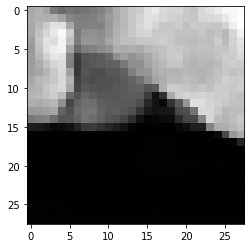

In [22]:
Size=28
qual_img=7
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [23]:
mean_value = np.mean(img)
img_new = img.copy()

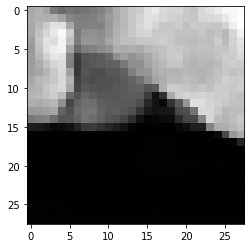

In [24]:
'''
for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0
'''
img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [25]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

4383.43287314926


In [26]:
Area_All, Diameter_All=PSDArea(df_size) 


In [27]:
df_size.shape

(134, 785)

In [28]:
# print(Area_All)
print(Diameter_All)

[1.3246742316847593, 1.2407845115923206, 1.3582501530608524, 1.4651359766197085, 1.5787921320164344, 0.9686532515566046, 1.061859831879401, 1.3967248911329992, 1.183292746729187, 1.0895496348895501, 1.2911760714282177, 1.0480325255099168, 1.5207313992658635, 1.0503934380095117, 1.4771196727733984, 1.740891042911505, 1.3628268186467185, 1.5027357818161167, 1.6060400034850042, 1.6667126623605446, 1.8126181953354348, 1.6093582801888149, 1.7288781081531763, 1.6544962236493914, 1.008271162571067, 1.1808420169736242, 1.5337275169389843, 1.0206656339667002, 1.0600039498080278, 1.7259834899643236, 1.1081571501687841, 1.1894539601938412, 1.0234163513780297, 1.0716851501565594, 1.1215798443886207, 1.2747803204356156, 1.6749481277160505, 1.018575569042861, 0.8328913271881813, 1.6175100403399518, 1.1635931760725964, 1.3944348549942474, 0.9702585275691916, 1.3368606613591665, 1.4341038782234086, 1.6675323872819912, 1.4199775572170321, 1.2637725315640373, 0.9969903201354603, 1.459849609102404, 1.538

In [29]:
diam = Diameter_All.copy()
PSD_value, Perc_value = PSD(diam)
print(Perc_value)

[ 0.          0.          0.          0.          0.          0.
  0.          1.49253731  8.20895522 23.13432836 67.1641791 ]


In [30]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 12.53 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [31]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [32]:
PSD_new, Perc_new = PSD(Diam1)  # imageJ
print(Perc_new)
print(Perc_value)

[ 0.          0.          0.          0.          0.          0.
  0.          4.21052632 10.52631579 23.15789474 62.10526316]
[ 0.          0.          0.          0.          0.          0.
  0.          1.49253731  8.20895522 23.13432836 67.1641791 ]


In [33]:
np.sum(np.array(Perc_value))

100.0

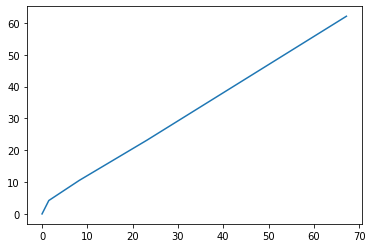

In [34]:
plt.plot( Perc_value,Perc_new )

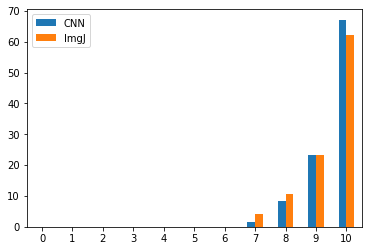

In [35]:
PSD_comparison = pd.DataFrame({ 'CNN':Perc_value,'ImgJ':Perc_new})
ax = PSD_comparison.plot.bar(rot=0)

In [36]:
results = smf.ols('ImgJ ~ CNN', data=PSD_comparison).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   ImgJ   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2219.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           4.38e-12
Time:                        20:55:10   Log-Likelihood:                -17.162
No. Observations:                  11   AIC:                             38.32
Df Residuals:                       9   BIC:                             39.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6832      0.423      1.614      0.1

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


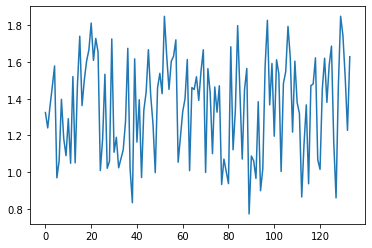

In [37]:
#plt.plot(Diam)
plt.plot(Diameter_All)

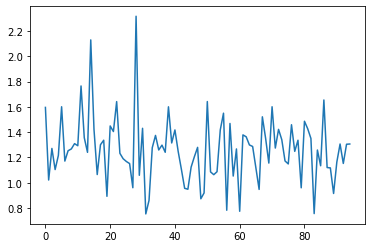

In [38]:
plt.plot(Diam1)

In [39]:
df_diam=pd.DataFrame(Diam1)
df_diam.describe()

,0
count,95.000000
mean,1.260307
std,0.258410
min,0.753568
25%,1.117893
50%,1.267607
75%,1.376667
max,2.317439


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


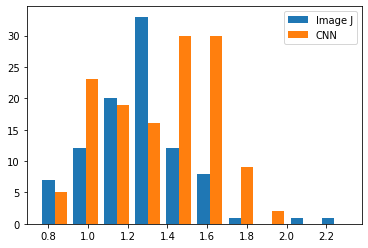

In [40]:
plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])

(array([ 4.,  7., 23., 12.,  6., 17., 23., 24., 11.,  7.]),
 array([0.77176483, 0.87958144, 0.98739804, 1.09521465, 1.20303125,
        1.31084786, 1.41866446, 1.52648107, 1.63429767, 1.74211428,
        1.84993088]),
 <a list of 10 Patch objects>)

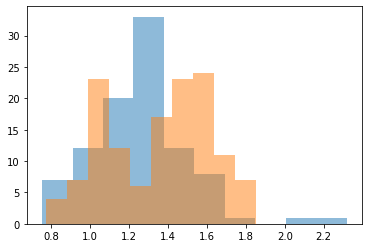

In [41]:
plt.hist(Diam1, alpha=0.5)
plt.hist(Diameter_All, alpha=0.5)